In [1]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    
import datetime

In [2]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    result = pd.DataFrame()
    files_to_be_read = glob.glob(os.path.join(folderpath, filename_pattern))
    for i in xrange(len(files_to_be_read)):
        try:
            df = pd.read_csv(files_to_be_read[i])
            result = result.append(df)
        except Exception as e:
            pass
    return result


### Read Data

In [3]:
#base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'
base_folderpath = '/local/tarciso/masters/data/trips-optimality-exp/part1/'
#base_folderpath = '/local/tarciso/data/'

#### Trips Improvement Capacity Data

In [114]:
#imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
#imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
imp_cap_df = pd.read_csv(base_folderpath + '/result.csv')

In [115]:
imp_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386507 entries, 0 to 386506
Data columns (total 11 columns):
date                 386507 non-null object
user_trip_id         386507 non-null int64
cardNum              386507 non-null int64
birthdate            110289 non-null object
gender               110282 non-null object
exec_start_time      386507 non-null object
executed_duration    386507 non-null float64
itinerary_id         386507 non-null int64
duration             386507 non-null object
alt_start_time       386507 non-null object
imp_capacity         130412 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 32.4+ MB


In [116]:
imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.1,2017-05-01 12:31:56,38.833333
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,2017-06-26 08:07:59,399.8333333333333,NaN
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.48333333333333,2017-06-26 10:06:30,-4.350000
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.33333333333333,2017-06-26 09:44:25,26.400000
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966666666666665,2017-06-26 05:46:44,287.216667


In [117]:
imp_cap_df.count()

date                 386507
user_trip_id         386507
cardNum              386507
birthdate            110289
gender               110282
exec_start_time      386507
executed_duration    386507
itinerary_id         386507
duration             386507
alt_start_time       386507
imp_capacity         130412
dtype: int64

#### Trips Itinerary Data

In [118]:
#trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [119]:
#trips_itineraries.columns

In [120]:
#trips_itineraries.describe()

In [121]:
#trips_itineraries.head(10)

### Preparing Data

#### Fixing swaped columns values 

In [122]:
imp_cap_df.dtypes

date                  object
user_trip_id           int64
cardNum                int64
birthdate             object
gender                object
exec_start_time       object
executed_duration    float64
itinerary_id           int64
duration              object
alt_start_time        object
imp_capacity         float64
dtype: object

In [123]:
def check_duration_value(trip_duration):
    try:
        datetime.datetime.strptime(trip_duration,'%Y-%m-%d %H:%M:%S')
        return False
    except Exception as e:
        return True
    
imp_cap_df['duration_val_check'] = imp_cap_df['duration'].apply(check_duration_value)

In [124]:
imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.1,2017-05-01 12:31:56,38.833333,True
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,2017-06-26 08:07:59,399.8333333333333,NaN,False
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.48333333333333,2017-06-26 10:06:30,-4.350000,True
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.33333333333333,2017-06-26 09:44:25,26.400000,True
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966666666666665,2017-06-26 05:46:44,287.216667,True


In [125]:
sum(imp_cap_df['duration_val_check'])

130412

In [126]:
imp_cap_df['tmp_duration'] = np.where(np.logical_not(imp_cap_df['duration_val_check']), imp_cap_df['alt_start_time'], imp_cap_df['duration'])
imp_cap_df['tmp_alt_start_time'] = np.where(np.logical_not(imp_cap_df['duration_val_check']), imp_cap_df['duration'], imp_cap_df['alt_start_time'])

In [127]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.1,2017-05-01 12:31:56,38.833333,True,12.1,2017-05-01 12:31:56
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,2017-06-26 08:07:59,399.8333333333333,NaN,False,399.8333333333333,2017-06-26 08:07:59
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.48333333333333,2017-06-26 10:06:30,-4.350000,True,117.48333333333333,2017-06-26 10:06:30
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.33333333333333,2017-06-26 09:44:25,26.400000,True,109.33333333333333,2017-06-26 09:44:25
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966666666666665,2017-06-26 05:46:44,287.216667,True,18.966666666666665,2017-06-26 05:46:44
5,2017-06-26,42949673089,2349876,NaN,NaN,2017-06-26 07:04:08,56.183333,1,11.100000000000001,2017-06-26 07:20:11,45.083333,True,11.100000000000001,2017-06-26 07:20:11
6,2017-06-26,60129542517,3720666,NaN,NaN,2017-06-26 17:43:41,55.566667,0,2017-06-26 17:43:41,55.56666666666667,NaN,False,55.56666666666667,2017-06-26 17:43:41
7,2017-06-26,77309411827,3855369,NaN,NaN,2017-06-26 10:30:54,54.983333,1,13.25,2017-06-26 10:28:54,41.733333,True,13.25,2017-06-26 10:28:54
8,2017-06-26,85899345982,1942614,NaN,NaN,2017-06-26 05:10:39,455.000000,0,2017-06-26 05:10:39,455.0,NaN,False,455.0,2017-06-26 05:10:39
9,2017-06-26,94489280851,3569332,NaN,NaN,2017-06-26 07:13:17,26.850000,0,2017-06-26 07:13:17,26.85,NaN,False,26.85,2017-06-26 07:13:17


In [128]:
imp_cap_df['duration'] = imp_cap_df['tmp_duration']
imp_cap_df['alt_start_time'] = imp_cap_df['tmp_alt_start_time']

In [129]:
imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.1,2017-05-01 12:31:56,38.833333,True,12.1,2017-05-01 12:31:56
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,399.8333333333333,2017-06-26 08:07:59,NaN,False,399.8333333333333,2017-06-26 08:07:59
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.48333333333333,2017-06-26 10:06:30,-4.350000,True,117.48333333333333,2017-06-26 10:06:30
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.33333333333333,2017-06-26 09:44:25,26.400000,True,109.33333333333333,2017-06-26 09:44:25
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966666666666665,2017-06-26 05:46:44,287.216667,True,18.966666666666665,2017-06-26 05:46:44


In [130]:
imp_cap_df['duration'] = imp_cap_df['duration'].astype('float')
imp_cap_df['imp_capacity'] = np.round(imp_cap_df['executed_duration'] - imp_cap_df['duration'], 2)

In [131]:
imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.100000,2017-05-01 12:31:56,38.83,True,12.1,2017-05-01 12:31:56
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,399.833333,2017-06-26 08:07:59,-0.00,False,399.8333333333333,2017-06-26 08:07:59
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.483333,2017-06-26 10:06:30,-4.35,True,117.48333333333333,2017-06-26 10:06:30
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.333333,2017-06-26 09:44:25,26.40,True,109.33333333333333,2017-06-26 09:44:25
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966667,2017-06-26 05:46:44,287.22,True,18.966666666666665,2017-06-26 05:46:44


In [132]:
imp_cap_df['lower_than_0'] = imp_cap_df['imp_capacity'] < 0

In [133]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time,lower_than_0
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.100000,2017-05-01 12:31:56,38.83,True,12.1,2017-05-01 12:31:56,False
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,399.833333,2017-06-26 08:07:59,-0.00,False,399.8333333333333,2017-06-26 08:07:59,False
2,2017-06-26,17179869424,3200375,NaN,NaN,2017-06-26 10:04:28,113.133333,1,117.483333,2017-06-26 10:06:30,-4.35,True,117.48333333333333,2017-06-26 10:06:30,True
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.333333,2017-06-26 09:44:25,26.40,True,109.33333333333333,2017-06-26 09:44:25,False
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966667,2017-06-26 05:46:44,287.22,True,18.966666666666665,2017-06-26 05:46:44,False
5,2017-06-26,42949673089,2349876,NaN,NaN,2017-06-26 07:04:08,56.183333,1,11.100000,2017-06-26 07:20:11,45.08,True,11.100000000000001,2017-06-26 07:20:11,False
6,2017-06-26,60129542517,3720666,NaN,NaN,2017-06-26 17:43:41,55.566667,0,55.566667,2017-06-26 17:43:41,0.00,False,55.56666666666667,2017-06-26 17:43:41,False
7,2017-06-26,77309411827,3855369,NaN,NaN,2017-06-26 10:30:54,54.983333,1,13.250000,2017-06-26 10:28:54,41.73,True,13.25,2017-06-26 10:28:54,False
8,2017-06-26,85899345982,1942614,NaN,NaN,2017-06-26 05:10:39,455.000000,0,455.000000,2017-06-26 05:10:39,0.00,False,455.0,2017-06-26 05:10:39,False
9,2017-06-26,94489280851,3569332,NaN,NaN,2017-06-26 07:13:17,26.850000,0,26.850000,2017-06-26 07:13:17,0.00,False,26.85,2017-06-26 07:13:17,False


In [134]:
print sum(imp_cap_df['lower_than_0'])

50442


In [135]:
imp_cap_df = imp_cap_df[np.logical_not(imp_cap_df.lower_than_0)]

#### Computing Improvement Capacity as a Percentage to avoid value magnitude bias

In [136]:
imp_cap_df['imp_capacity_perc'] = imp_cap_df['imp_capacity'] / imp_cap_df['executed_duration']

In [137]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time,lower_than_0,imp_capacity_perc
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.100000,2017-05-01 12:31:56,38.83,True,12.1,2017-05-01 12:31:56,False,0.762369
1,2017-06-26,8589934627,1713404,NaN,NaN,2017-06-26 08:07:59,399.833333,0,399.833333,2017-06-26 08:07:59,-0.00,False,399.8333333333333,2017-06-26 08:07:59,False,-0.000000
3,2017-06-26,17179869486,3398765,25/09/01,F,2017-06-26 09:39:39,135.733333,1,109.333333,2017-06-26 09:44:25,26.40,True,109.33333333333333,2017-06-26 09:44:25,False,0.194499
4,2017-06-26,25769804066,3506093,NaN,NaN,2017-06-26 05:40:03,306.183333,1,18.966667,2017-06-26 05:46:44,287.22,True,18.966666666666665,2017-06-26 05:46:44,False,0.938065
5,2017-06-26,42949673089,2349876,NaN,NaN,2017-06-26 07:04:08,56.183333,1,11.100000,2017-06-26 07:20:11,45.08,True,11.100000000000001,2017-06-26 07:20:11,False,0.802373
6,2017-06-26,60129542517,3720666,NaN,NaN,2017-06-26 17:43:41,55.566667,0,55.566667,2017-06-26 17:43:41,0.00,False,55.56666666666667,2017-06-26 17:43:41,False,0.000000
7,2017-06-26,77309411827,3855369,NaN,NaN,2017-06-26 10:30:54,54.983333,1,13.250000,2017-06-26 10:28:54,41.73,True,13.25,2017-06-26 10:28:54,False,0.758957
8,2017-06-26,85899345982,1942614,NaN,NaN,2017-06-26 05:10:39,455.000000,0,455.000000,2017-06-26 05:10:39,0.00,False,455.0,2017-06-26 05:10:39,False,0.000000
9,2017-06-26,94489280851,3569332,NaN,NaN,2017-06-26 07:13:17,26.850000,0,26.850000,2017-06-26 07:13:17,0.00,False,26.85,2017-06-26 07:13:17,False,0.000000
11,2017-06-26,111669149822,2488824,NaN,NaN,2017-06-26 13:21:02,6.666667,0,6.666667,2017-06-26 13:21:02,0.00,False,6.666666666666667,2017-06-26 13:21:02,False,0.000000


#### Computing hour of day and period of day for each trip

In [138]:
imp_cap_df['hour_of_day'] = pd.to_datetime(imp_cap_df['exec_start_time'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [139]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

imp_cap_df = imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time,lower_than_0,imp_capacity_perc,hour_of_day,period_of_day
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.10,2017-05-01 12:31:56,38.83,True,12.1,2017-05-01 12:31:56,False,0.762369,12,midday
1,2017-06-26,274877907255,3513630,NaN,NaN,2017-06-26 12:54:39,136.000000,0,136.00,2017-06-26 12:54:39,0.00,False,136.0,2017-06-26 12:54:39,False,0.000000,12,midday
2,2017-06-26,352187318273,10008515,NaN,NaN,2017-06-26 12:14:40,50.650000,0,50.65,2017-06-26 12:14:40,0.00,False,50.65,2017-06-26 12:14:40,False,0.000000,12,midday
3,2017-06-26,455266533911,3856388,04/06/01,F,2017-06-26 12:25:58,33.700000,0,33.70,2017-06-26 12:25:58,0.00,False,33.7,2017-06-26 12:25:58,False,0.000000,12,midday
4,2017-06-26,489626271981,3243098,11/05/68,F,2017-06-26 12:20:54,31.050000,0,31.05,2017-06-26 12:20:54,0.00,False,31.05,2017-06-26 12:20:54,False,0.000000,12,midday


#### Computing hour of day and period of day for each trip

In [140]:
def get_trip_len_bucket(trip_duration):
    if (trip_duration < 15):
        return '0_15'
    elif (trip_duration < 30):
        return '15_30'
    elif (trip_duration < 45):
        return '30_45'
    elif (trip_duration >= 45):
        return '45+'
    else:
        return 'NA'


imp_cap_df['trip_length_bucket'] = imp_cap_df['executed_duration'].apply(get_trip_len_bucket)

In [141]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,duration_val_check,tmp_duration,tmp_alt_start_time,lower_than_0,imp_capacity_perc,hour_of_day,period_of_day,trip_length_bucket
0,2017-05-01,652835029003,2252514,16/12/89,M,2017-05-01 12:33:56,50.933333,1,12.100000,2017-05-01 12:31:56,38.83,True,12.1,2017-05-01 12:31:56,False,0.762369,12,midday,45+
1,2017-06-26,274877907255,3513630,NaN,NaN,2017-06-26 12:54:39,136.000000,0,136.000000,2017-06-26 12:54:39,0.00,False,136.0,2017-06-26 12:54:39,False,0.000000,12,midday,45+
2,2017-06-26,352187318273,10008515,NaN,NaN,2017-06-26 12:14:40,50.650000,0,50.650000,2017-06-26 12:14:40,0.00,False,50.65,2017-06-26 12:14:40,False,0.000000,12,midday,45+
3,2017-06-26,455266533911,3856388,04/06/01,F,2017-06-26 12:25:58,33.700000,0,33.700000,2017-06-26 12:25:58,0.00,False,33.7,2017-06-26 12:25:58,False,0.000000,12,midday,30_45
4,2017-06-26,489626271981,3243098,11/05/68,F,2017-06-26 12:20:54,31.050000,0,31.050000,2017-06-26 12:20:54,0.00,False,31.05,2017-06-26 12:20:54,False,0.000000,12,midday,30_45
5,2017-06-26,687194767730,3740815,NaN,NaN,2017-06-26 12:11:17,70.200000,0,70.200000,2017-06-26 12:11:17,0.00,False,70.2,2017-06-26 12:11:17,False,0.000000,12,midday,45+
6,2017-06-26,1159641170210,3469982,NaN,NaN,2017-06-26 12:22:13,41.400000,2,13.416667,2017-06-26 12:24:36,27.98,True,13.416666666666668,2017-06-26 12:24:36,False,0.675845,12,midday,30_45
7,2017-07-05,399,3756182,NaN,NaN,2017-07-05 12:32:19,210.100000,0,210.100000,2017-07-05 12:32:19,0.00,False,210.1,2017-07-05 12:32:19,False,0.000000,12,midday,45+
8,2017-07-05,17179869427,3202700,NaN,NaN,2017-07-05 12:54:54,159.050000,0,159.050000,2017-07-05 12:54:54,0.00,False,159.05,2017-07-05 12:54:54,False,0.000000,12,midday,45+
9,2017-07-05,94489280786,3453305,NaN,NaN,2017-07-05 12:10:56,12.050000,0,12.050000,2017-07-05 12:10:56,0.00,False,12.05,2017-07-05 12:10:56,False,0.000000,12,midday,0_15


### Analyzing Data Distribution

### Improvement Capacity Percentage

#### Overall

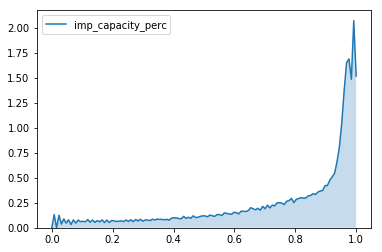

In [142]:
sns.kdeplot(imp_cap_df.imp_capacity_perc, shade=True)

In [143]:
imp_cap_df.imp_capacity_perc.describe()

count    336065.000000
mean          0.183462
std           0.351319
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.999953
Name: imp_capacity_perc, dtype: float64

#### Removing outliers (lower/higher 5%)

In [144]:
fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,95)

print fith_perc, ninety_fith_perc

0.0 0.973324393523


In [145]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity_perc > fith_perc) & (imp_cap_df.imp_capacity_perc < ninety_fith_perc)].copy()

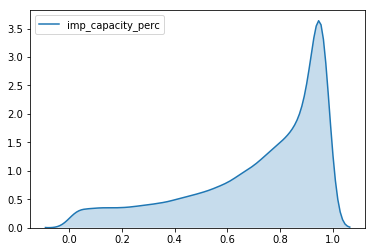

In [146]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity_perc, shade=True)

In [147]:
filtered_imp_cap_df.imp_capacity_perc.describe()

count    63220.000000
mean         0.712619
std          0.260173
min          0.000174
25%          0.567513
50%          0.801650
75%          0.930274
max          0.973324
Name: imp_capacity_perc, dtype: float64

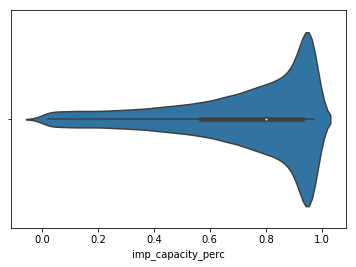

In [148]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity_perc)

#### Per trip length 

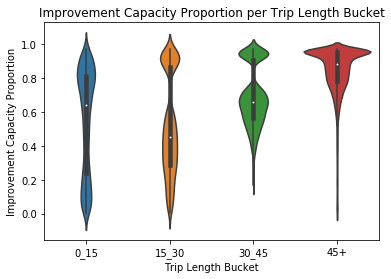

In [155]:
trip_len_order=['0_15','15_30','30_45','45+']
ax = sns.violinplot(x='trip_length_bucket',y='imp_capacity_perc', data=filtered_imp_cap_df, order=trip_len_order)
ax.set(xlabel='Trip Length Bucket',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Trip Length Bucket')
plt.show()

#### Per hour of day

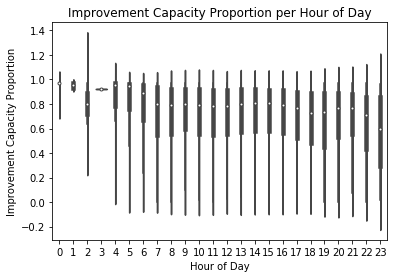

In [156]:
ax = sns.violinplot(x='hour_of_day',y='imp_capacity_perc', data=filtered_imp_cap_df)
ax.set(xlabel='Hour of Day',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Hour of Day')
plt.show()

#### Per period of day

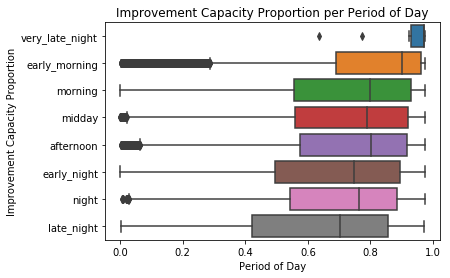

In [158]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
ax = sns.boxplot(x='imp_capacity_perc',y='period_of_day', data=filtered_imp_cap_df, order=period_of_day_order)
ax.set(xlabel='Period of Day',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Period of Day')
plt.show()

#### Per trip length and Period of Day

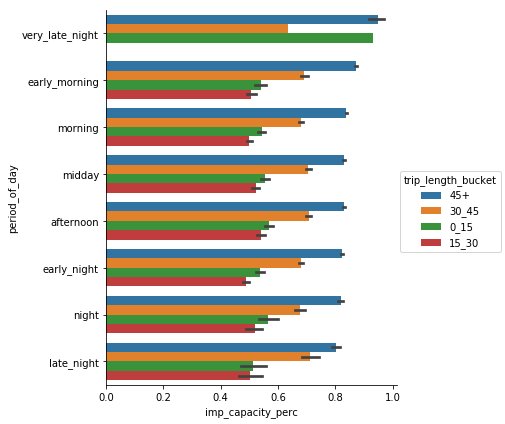

In [153]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.factorplot(x='imp_capacity_perc',y='period_of_day',hue='trip_length_bucket', data=filtered_imp_cap_df, kind='bar', size=6, order=col_order)

### Raw Improvement Capacity

#### Overall

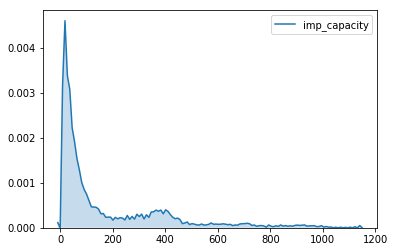

In [12]:
sns.kdeplot(imp_cap_df.imp_capacity, shade=True)

In [13]:
imp_cap_df.imp_capacity.describe()

count    24911.000000
mean        61.529759
std        153.104315
min          0.000000
25%          0.000000
50%          0.000000
75%         32.600000
max       1139.816667
Name: imp_capacity, dtype: float64

#### Removing outliers (lower/higher 5%)

In [14]:
fith_perc = np.percentile(imp_cap_df.imp_capacity,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity,95)

print fith_perc, ninety_fith_perc

0.0 400.841666667


In [15]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity > fith_perc) & (imp_cap_df.imp_capacity < ninety_fith_perc)].copy()

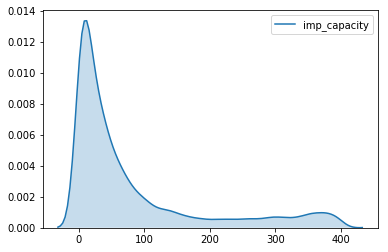

In [16]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity, shade=True)

In [17]:
filtered_imp_cap_df.imp_capacity.describe()

count    9.620000e+03
mean     7.989378e+01
std      1.051678e+02
min      2.220446e-16
25%      1.051250e+01
50%      3.480833e+01
75%      9.509167e+01
max      4.008333e+02
Name: imp_capacity, dtype: float64

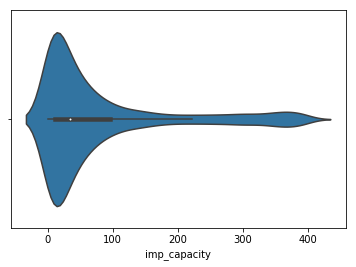

In [18]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity)

#### Per Hour of Day

In [19]:
filtered_imp_cap_df['hour_of_day'] = pd.to_datetime(filtered_imp_cap_df['o_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [20]:
filtered_imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,6
3,2017-06-20,721554505827,3,8.650000,2017-06-20 12:02:59,61.183333,52.533333,12
4,2017-06-20,747324309522,1,12.450000,2017-06-20 07:45:40,81.866667,69.416667,7
7,2017-06-20,1219770712204,1,12.200000,2017-06-20 17:20:58,157.116667,144.916667,17
8,2017-06-20,1288490188874,2,8.633333,2017-06-20 07:26:59,12.783333,4.150000,7


In [21]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

,hour_of_day,period_of_day
0,0,very_late_night
1,1,very_late_night
2,2,very_late_night
3,3,very_late_night
4,4,early_morning
5,5,early_morning
6,6,early_morning
7,7,morning
8,8,morning
9,9,morning


In [22]:
imp_period_of_day = filtered_imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

In [23]:
imp_period_of_day.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day,period_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,6,early_morning
1,2017-06-21,60129542284,3,10.250000,2017-06-21 06:41:49,39.166667,28.916667,6,early_morning
2,2017-06-19,558345748595,3,13.883333,2017-06-19 06:40:06,171.683333,157.800000,6,early_morning
3,2017-06-19,670014898285,2,16.283333,2017-06-19 06:48:29,100.400000,84.116667,6,early_morning
4,2017-06-19,738734374929,2,23.300000,2017-06-19 06:02:14,55.583333,32.283333,6,early_morning


/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1844: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


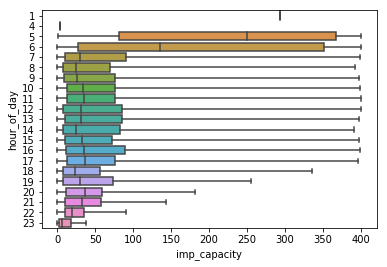

In [24]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity, y=filtered_imp_cap_df.hour_of_day, data=filtered_imp_cap_df, 
            whis=np.inf, orient='h')

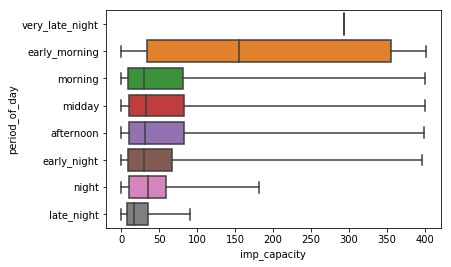

In [25]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.boxplot(x=imp_period_of_day.imp_capacity, y=imp_period_of_day.period_of_day, data=imp_period_of_day,
            order=col_order,whis=np.inf)

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)